<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/Lunar_DEM_Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hunter Danque, Britt Adkins, Deniz Donmez
Lunar Data DEM load
November 6, 2020

1. Load in a data file from your research or independent project? Does it require a package (like lasio or obspy)? After you have loaded it in, can you make it into a pandas dataframe easily? If not, why?

In [1]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
%ls
%cd Colab/

 Colab/
'Colab Notebooks'/
'Copy of Titanic.csv'
 data@
 FolderTree_HD.gscript
 _GEOL557/
'GEOL557_Colab Notebooks'/
 GEOL557_Output/
 GEOL557_Shared_Lunar_DEM_Load.ipynb
'Getting started.pdf'
 IMG_7711.PNG
 spoledem10mcb.asc.txt
'SPRS503_Spring_2020_Week4_Danque_Cook_Space Force.gdoc'
 Transform2020-master/
/content/gdrive/My Drive/Colab


In [11]:
pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others

     |████████████████████████████████| 1.4MB 9.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.3MB 229kB/s 
     |████████████████████████████████| 972kB 42.0MB/s 
     |████████████████████████████████| 14.8MB 315kB/s 
     |████████████████████████████████| 6.5MB 22.7MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=ce9a5761462577868a761aab55c89af5160b907e48bfd61de1a7e8a2ead9c07d
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio

In [ ]:
#folder_path = '/content/gdrive/My Drive/Colab/' # makes a path
#file_name = 'SPoleDEM10mCb.tif' # file name
#folder_file = 'content/gdrive/My Drive/Colab/SPoleDEM10mCb.tif'
%cd  #path to folder with the data on My Drive
#%cd /content/gdrive/Shared\ drives/GEOL557_Group_Project/data #path to folder with the data on Shared drive

[Errno 2] No such file or directory: '/ #path to folder with the data on My Drive'
/content


In [ ]:
%ls #verify the files

gdrive/  sample_data/


In [13]:
with rio.open('SPoleDEM10mCb.tif') as spDEM10m:
      spDEM10m_np= spDEM10m.read(1)


In [14]:
spDEM10m

<closed DatasetReader name='SPoleDEM10mCb.tif' mode='r'>

In [15]:
spDEM10m_np

array([[ -836,  -837,  -838, ..., -1652, -1649, -1647],
       [ -835,  -836,  -837, ..., -1654, -1651, -1649],
       [ -834,  -835,  -835, ..., -1656, -1654, -1652],
       ...,
       [ -926,  -925,  -925, ..., -3920, -3920, -3921],
       [ -925,  -925,  -925, ..., -3921, -3922, -3922],
       [ -924,  -924,  -924, ..., -3923, -3923, -3924]], dtype=int16)

In [16]:
df_spDEM10m = pd.DataFrame(data=spDEM10m_np) #Numpy array to Pandas dataframe

In [17]:
df_spDEM10m.iloc[0:5, 0:10] 

,0,1,2,3,4,5,6,7,8,9
0,-836,-837,-838,-839,-840,-841,-842,-843,-845,-846
1,-835,-836,-837,-838,-839,-840,-841,-842,-843,-844
2,-834,-835,-835,-837,-838,-839,-840,-841,-842,-843
3,-833,-833,-834,-835,-836,-838,-839,-840,-841,-842
4,-832,-833,-833,-834,-835,-837,-838,-839,-840,-841


In [30]:
df_spDEM10m.iloc[0:5, 0:10].describe() 

,0,1,2,3,4,5,6,7,8,9
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-834.000000,-834.800000,-835.400000,-836.600000,-837.600000,-839.000000,-840.000000,-841.000000,-842.200000,-843.200000
std,1.581139,1.788854,2.073644,2.073644,2.073644,1.581139,1.581139,1.581139,1.923538,1.923538
min,-836.000000,-837.000000,-838.000000,-839.000000,-840.000000,-841.000000,-842.000000,-843.000000,-845.000000,-846.000000
25%,-835.000000,-836.000000,-837.000000,-838.000000,-839.000000,-840.000000,-841.000000,-842.000000,-843.000000,-844.000000
50%,-834.000000,-835.000000,-835.000000,-837.000000,-838.000000,-839.000000,-840.000000,-841.000000,-842.000000,-843.000000
75%,-833.000000,-833.000000,-834.000000,-835.000000,-836.000000,-838.000000,-839.000000,-840.000000,-841.000000,-842.000000
max,-832.000000,-833.000000,-833.000000,-834.000000,-835.000000,-837.000000,-838.000000,-839.000000,-840.000000,-841.000000


In [18]:
df_spDEM10m.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Columns: 6649 entries, 0 to 6648
dtypes: int16(6649)
memory usage: 54.7 MB


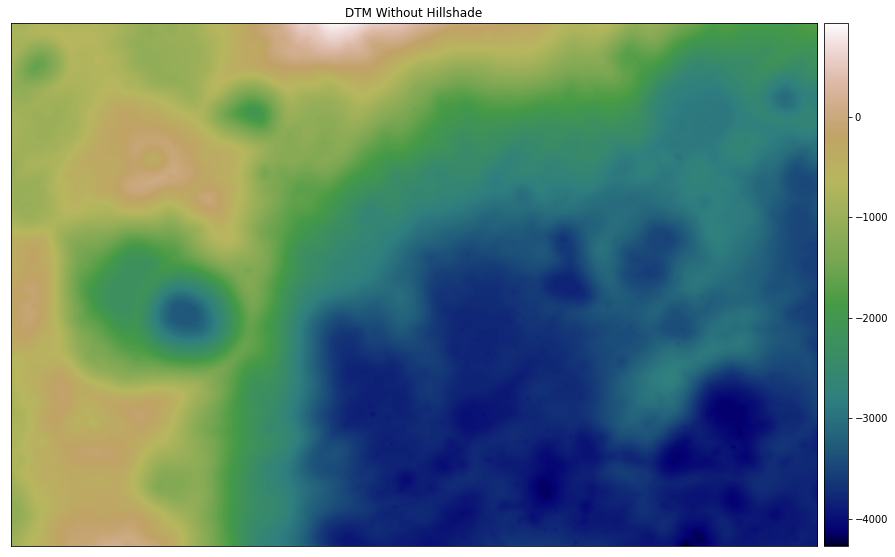

In [23]:
# Plot the data https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
ep.plot_bands(
    df_spDEM10m,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(15, 10),
)
plt.show()

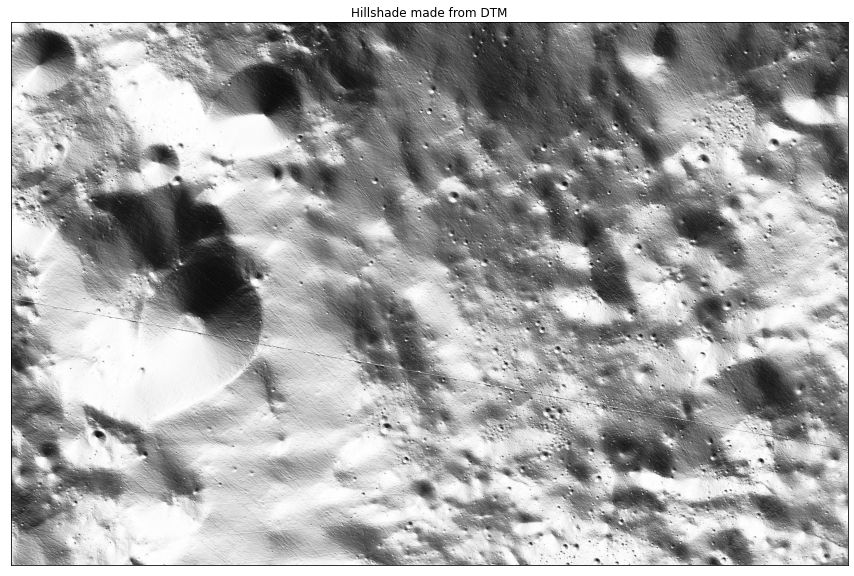

In [24]:
# Create and plot the hillshade with earthpy https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_spDEM10m)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from DTM", figsize=(15, 10),
)
plt.show()

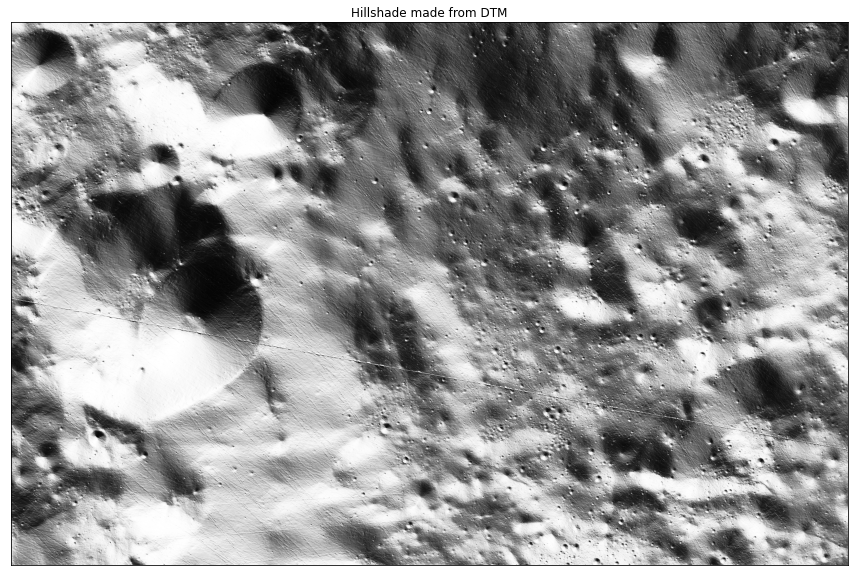

In [26]:
# Create and plot the hillshade with earthpy https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade30_10 = es.hillshade(df_spDEM10m, azimuth=30, altitude=10)

ep.plot_bands(
    hillshade30_10, cbar=False, title="Hillshade made from DTM", figsize=(15, 10),
)
plt.show()

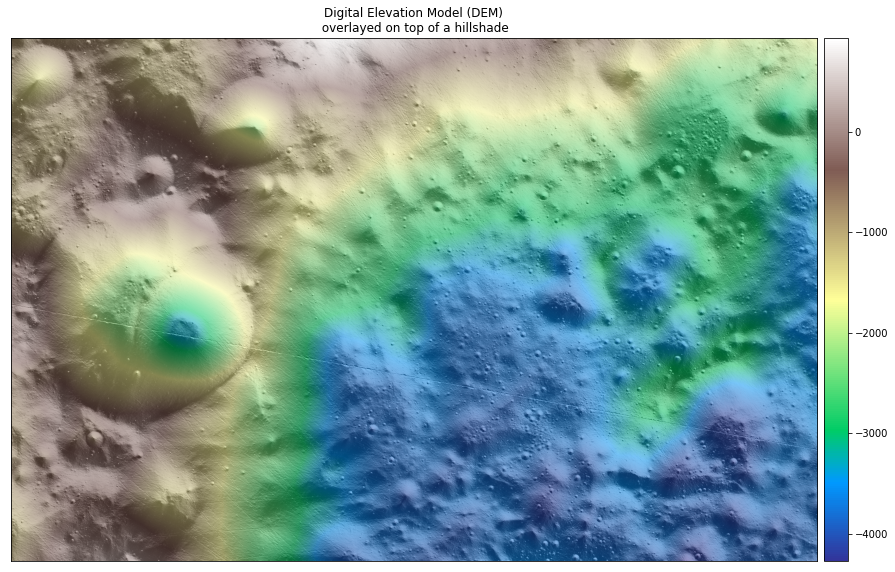

In [29]:
# Plot the DEM and hillshade at the same time
# sphinx_gallery_thumbnail_number = 5
fig, ax = plt.subplots(figsize=(15, 10))
ep.plot_bands(
    df_spDEM10m,
    ax=ax,
    cmap="terrain",
    title="Digital Elevation Model (DEM)\n overlayed on top of a hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()